Brayan Estiven Salcedo Suarez 202022731
Julian Parra 202013033

### Descripción del entendimiento de datos
El conjunto de datos proviene del análisis del comportamiento financiero de los clientes de una empresa emisorade tarjetas de crédito y contiene información sobre sus saldos, límites de crédito, entre otros. Cada fila representa un cliente y sus caracterisitcas especificas, permitiendo la identificación de patrones y segmentación en función de su comportamiento de gasto en centros comerciales.

Los atributos se peuden clasificar en las siguientes categorias:

- **Datos financieros**
- SALDO: saldo actual en la cuenta del cliente
- LÍMITE_CREDITO: límite máximo de crédito asigando
- PAGOS: monto toal de pagos realizados
- PAGOS_MINIMOS: Monto de pagos minimos realizados
- **Comportamiento de compra**
- COMPRAS
- COMPRAS_PUNTUALES
- COMPRAS_PLAZOS
- AVANCE_EFECTIVO
- **Frecuencia de actividades**
- F_SALDO
- F_COMPRAS
- F_COMPRAS_PUNTUALES
- F_COMPRAS_PLAZOS
- F_AVANCE_EFECTIVO
- F_PAGOS_COMPLETOS

### Carga de librereias necesarias para implementación

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'ace_tools'

### Cargar los datos

In [2]:
df = pd.read_csv('./202510_Laboratorio 2 - Agrupación_Customer_Data.csv', sep=';', encoding = "ISO-8859-1")

### Entendimiento de los datos

In [3]:
df.shape

(8950, 18)

In [4]:
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [6]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


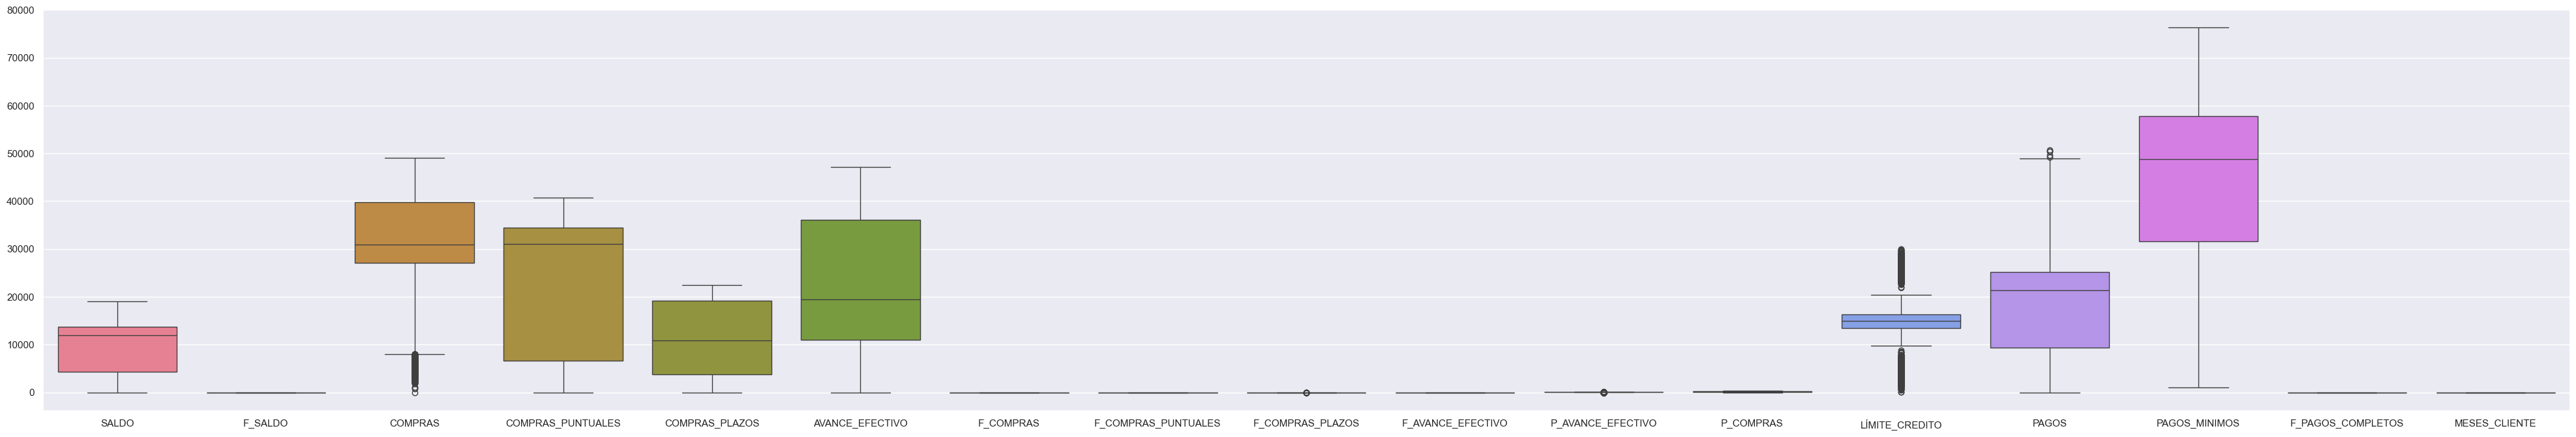

In [7]:
fig = plt.figure(figsize=(50,8))
ax = sns.boxplot(data = df, orient ="v")

Para poder ver las variables con dominios similares para entenderlas mejor. En este caso se va a normalizar los datos numericos para comparar mejor. Pero antes se elimina las variables categoricas como ID.

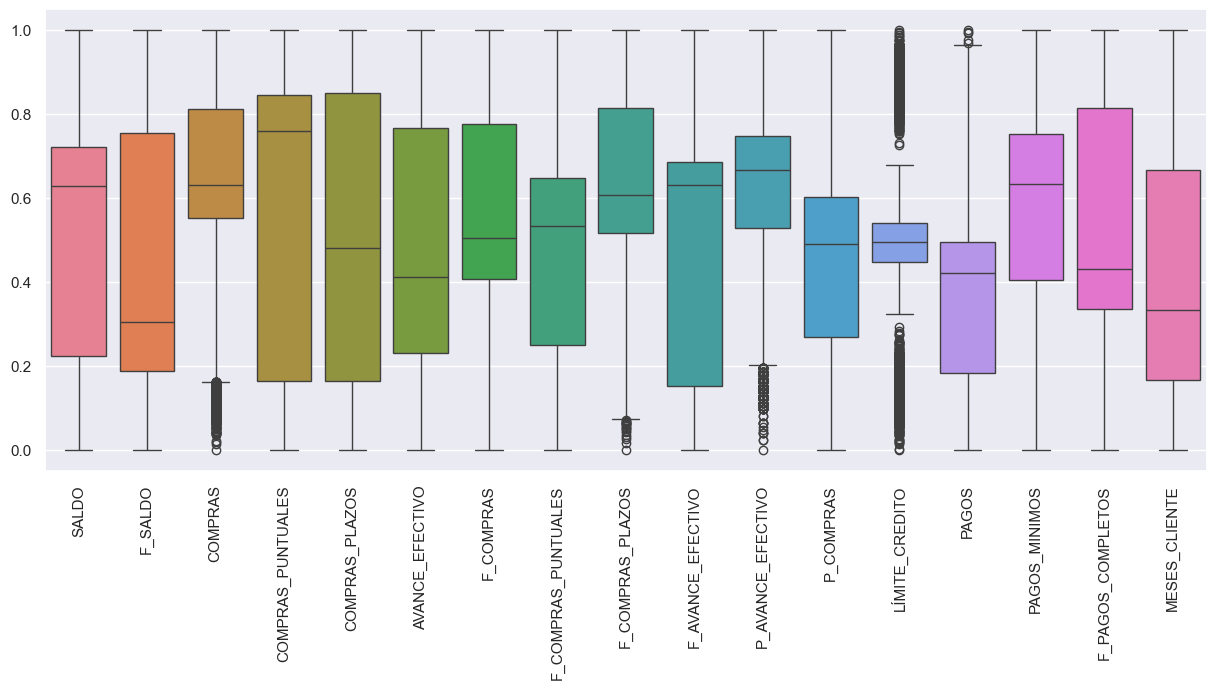

In [8]:
from sklearn.preprocessing import MinMaxScaler

df_copy = df.drop(columns=['ID'])

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

plt.figure(figsize=(15,6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.show()

Ahora vamos a ver las variables separando por enteros y por flotantes.

In [9]:
name_cols_float = df_copy.select_dtypes(include = ['float']).columns
name_cols_int = df_copy.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['P_AVANCE_EFECTIVO', 'P_COMPRAS', 'MESES_CLIENTE'], dtype='object')

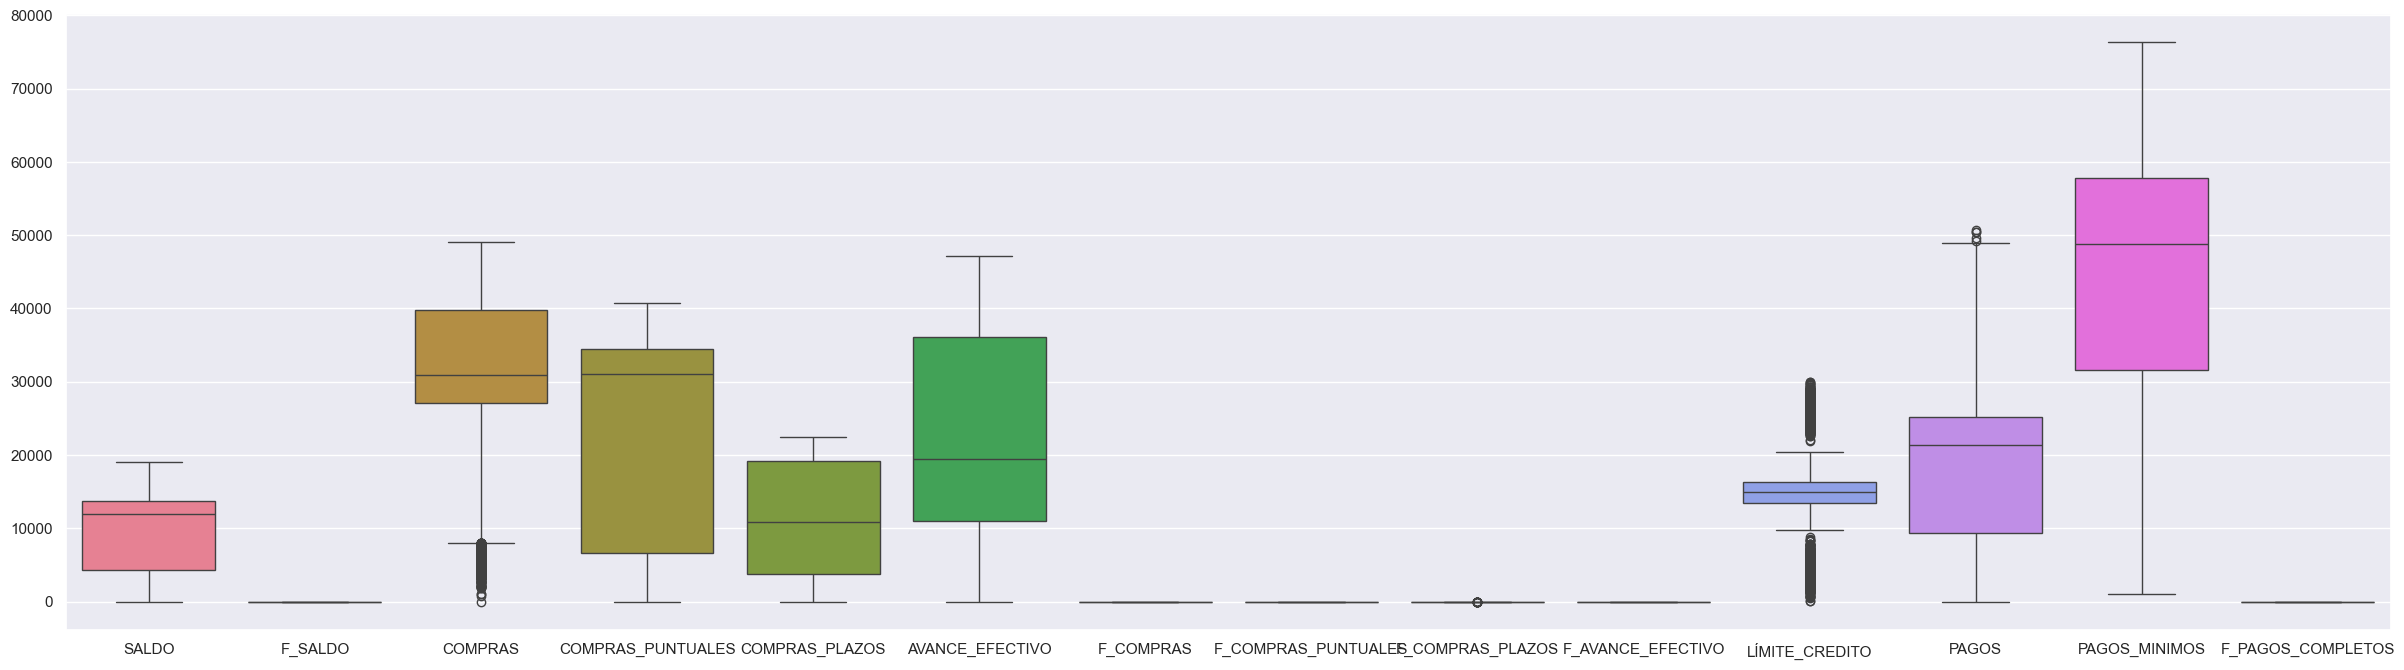

In [10]:
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=df_copy[name_cols_float], orient="v")

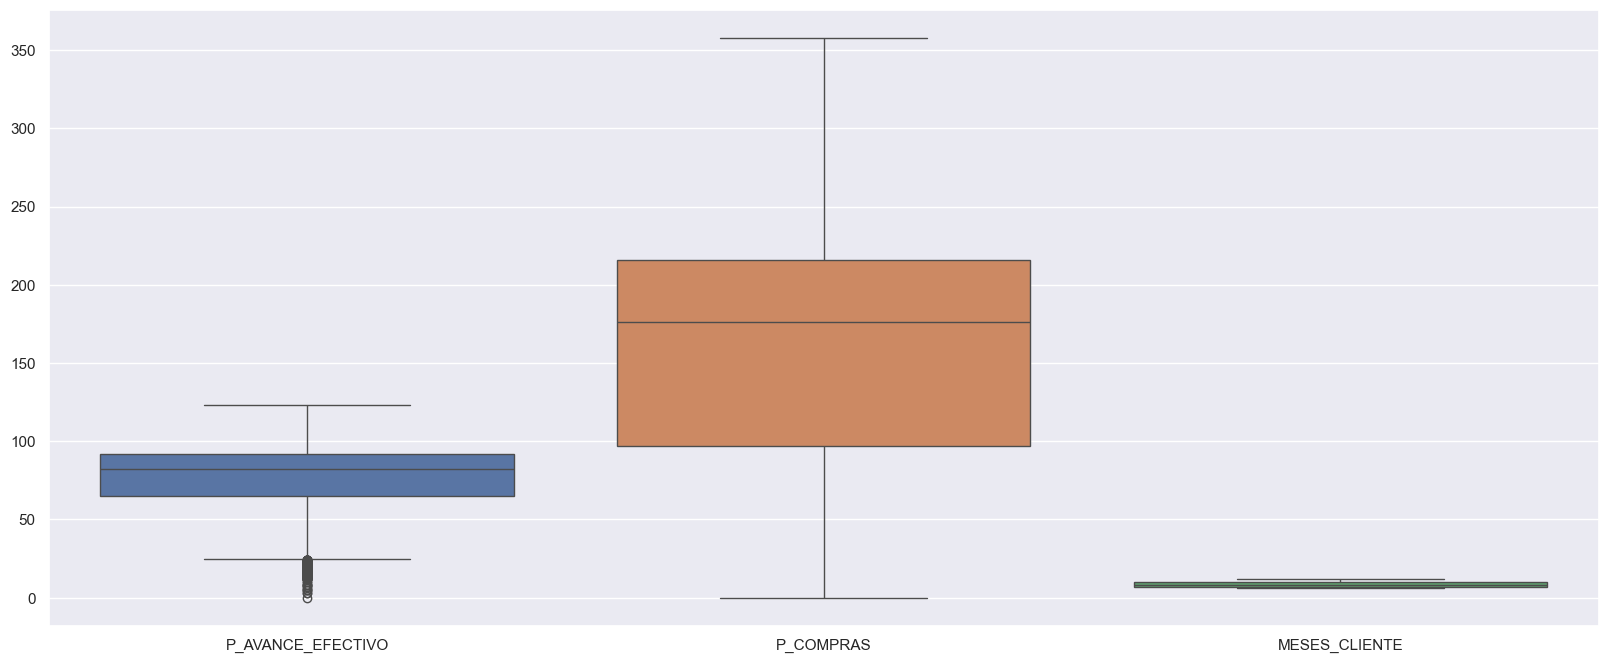

In [11]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_copy[name_cols_int], orient="v")

Ahora vamos a observar las variables que no son númericos

In [12]:
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['ID'], dtype='object')

In [13]:
df[name_cols_non_number].describe()

,ID
count,8950
unique,8950
top,C18950
freq,1


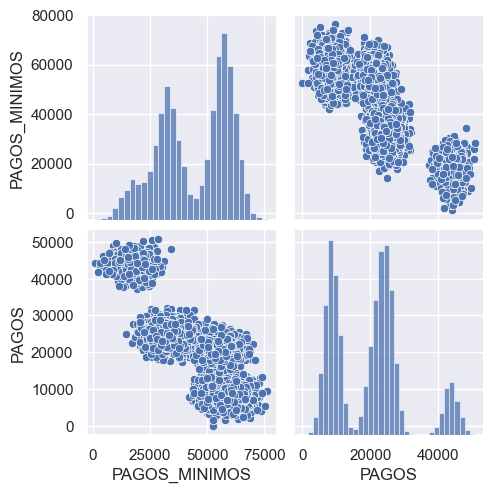

In [19]:
df_pagos = df[['PAGOS_MINIMOS', 'PAGOS']]
sns.pairplot(df_pagos)
plt.show()

#### Análisis
- La variable categorica ID no es necesaria para analizar, debido a que es la identificación única que tiene cada cliente.
- Se evidencia que hay patrones de agrupación en islas, lo que sugiere que existen diferentes grupos o categorias en los datos.

### Limpieza de los datos

#### Completitud

In [20]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PAGOS_MINIMOS          0.034972
LÍMITE_CREDITO         0.000112
SALDO                  0.000000
ID                     0.000000
F_SALDO                0.000000
COMPRAS                0.000000
AVANCE_EFECTIVO        0.000000
F_COMPRAS              0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS_PLAZOS         0.000000
F_COMPRAS_PLAZOS       0.000000
F_COMPRAS_PUNTUALES    0.000000
P_AVANCE_EFECTIVO      0.000000
F_AVANCE_EFECTIVO      0.000000
P_COMPRAS              0.000000
PAGOS                  0.000000
F_PAGOS_COMPLETOS      0.000000
MESES_CLIENTE          0.000000
dtype: float64

Se observa que PAGOS_MINIMOS cuenta con un porcentaje del 0.034972 de datos nulos y LIMITE_CREDITO cuenta con un porcentaje de 0.000112 asi que se decidió remplazar por la media de PAGOS_MINIMOS y de LIMITE_CREDITO.

In [22]:
df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].mean(), inplace=True)

C:\Users\Julian\AppData\Local\Temp\ipykernel_15108\7332186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].mean(), inplace=True)


In [23]:
df['LÍMITE_CREDITO'].fillna(df['LÍMITE_CREDITO'].mean(), inplace=True)

C:\Users\Julian\AppData\Local\Temp\ipykernel_15108\871973506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LÍMITE_CREDITO'].fillna(df['LÍMITE_CREDITO'].mean(), inplace=True)


In [24]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

ID                     0.0
SALDO                  0.0
F_SALDO                0.0
COMPRAS                0.0
COMPRAS_PUNTUALES      0.0
COMPRAS_PLAZOS         0.0
AVANCE_EFECTIVO        0.0
F_COMPRAS              0.0
F_COMPRAS_PUNTUALES    0.0
F_COMPRAS_PLAZOS       0.0
F_AVANCE_EFECTIVO      0.0
P_AVANCE_EFECTIVO      0.0
P_COMPRAS              0.0
LÍMITE_CREDITO         0.0
PAGOS                  0.0
PAGOS_MINIMOS          0.0
F_PAGOS_COMPLETOS      0.0
MESES_CLIENTE          0.0
dtype: float64

#### Unicidad

In [25]:
df.duplicated(keep = False).sum()

np.int64(0)

#### Consistencia

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8950 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8950 non-null   f

#### Validez

In [28]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5536.765296,11069.268177,15195.396929,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.851473,9329.603116,31852.988945,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.326700,21367.621275,46696.585380,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.513232,25219.127372,57527.279113,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Se evidencia que todos los valores de cada variable corresponden con los rangos mencionados en el diccionario.

## Construcción modelo

In [35]:
variables_numericas = [
    "SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS",
    "AVANCE_EFECTIVO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS",
    "F_AVANCE_EFECTIVO", "P_AVANCE_EFECTIVO", "P_COMPRAS", "LÍMITE_CREDITO",
    "PAGOS", "PAGOS_MINIMOS", "F_PAGOS_COMPLETOS", "MESES_CLIENTE"
]

df_clustering = df[variables_numericas]


Ahora vamos a normalizar los datos para favorecer el rendimiento a la hora de entrenar el modelo.

In [44]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

df_scaled = pd.DataFrame(df_scaled, columns=variables_numericas)

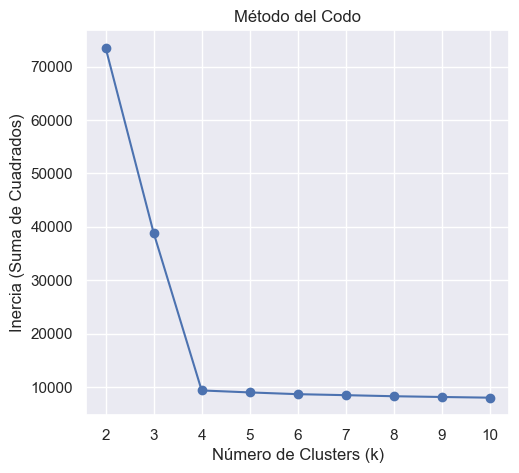

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores de k a evaluar
k_values = range(2, 11)

# Listas para almacenar métricas
inertia = []
silhouette_scores = []

# Evaluar K-Means para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Suma de Cuadrados)")
plt.title("Método del Codo")

plt.show()


En la grafica de método del codo se evidencia que el número ideal de cluster es 4 debido a que este es el punto donde la gráfica empieza a aplanarse.

In [53]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

In [55]:
res_kmeans = kmeans.fit(df_clustering)

In [57]:
res_kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)